## **LOAD DATASET**

In [1]:
#import library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
data = pd.read_csv("dataset/bpjs.csv")

In [5]:
data.sample(10)

,visit_id,kdkc,dati2,typeppk,jkpst,umur,jnspelsep,los,cmg,severitylevel,...,proc63_67,proc68_70,proc71_73,proc74_75,proc76_77,proc78_79,proc80_99,proce00_e99,procv00_v89,label
66033,66034,401,69,SC,L,36,1,2,N,1,...,0,0,0,0,0,0,3,0,0,1
15043,15044,2302,346,C,P,48,2,0,I,0,...,0,0,0,0,0,0,3,0,0,1
58511,58512,1108,171,GD,L,17,2,0,Q,0,...,0,0,0,0,0,0,0,0,0,1
131329,131330,2201,227,SC,P,50,1,2,L,1,...,0,0,0,0,0,0,1,0,0,0
97977,97978,1314,195,D,P,33,1,2,B,2,...,0,0,1,0,0,0,0,0,0,1
73740,73741,203,31,C,P,54,2,0,Q,0,...,0,0,0,0,0,0,0,0,0,1
27373,27374,601,90,I3,P,73,2,0,Q,0,...,0,0,0,0,0,0,0,0,0,1
176783,176784,501,82,C,P,57,2,0,G,0,...,0,0,0,0,0,0,0,0,0,0
30944,30945,1107,150,SB,L,0,1,2,P,1,...,0,0,0,0,0,0,0,0,0,1
120480,120481,2103,308,C,P,47,1,3,E,1,...,0,0,0,0,0,0,0,0,0,0


## **DATA UNDERSTANDING** 

In [9]:
#Membagi data menjadi menjadi 2 berdasarkan label (fraud/non-fraud)
grouped = data.groupby("label")

In [10]:
data_fraud = grouped.get_group(1)
data_non_fraud = grouped.get_group(0)

In [11]:
data_fraud.sample(5)

,visit_id,kdkc,dati2,typeppk,jkpst,umur,jnspelsep,los,cmg,severitylevel,...,proc63_67,proc68_70,proc71_73,proc74_75,proc76_77,proc78_79,proc80_99,proce00_e99,procv00_v89,label
83423,83424,1005,134,B,P,28,2,0,Q,0,...,0,0,0,0,0,0,0,0,0,1
55673,55674,701,97,SC,P,7,2,0,U,0,...,0,0,0,0,0,0,1,0,0,1
82499,82500,1108,171,C,L,52,2,0,Q,0,...,0,0,0,0,0,0,1,0,0,1
21961,21962,1701,290,B,L,0,1,3,P,1,...,0,0,0,0,0,0,0,0,0,1
10657,10658,1603,297,C,L,52,2,0,H,0,...,0,0,0,0,0,0,2,0,0,1


In [12]:
#melihat rata2 umur pasien yang melakukan kecurangan berdasarkan gender
data_fraud.groupby('jkpst', as_index=False).umur.mean()

,jkpst,umur
0,L,36.330913
1,P,37.893959


Dari hasil diatas, kita dapat melihat bahwa rata2 umur pasien berkelamin perempuan yang melakukan kecurangan adalah 38 tahun dan laki laki 36 tahun

In [13]:
#melihat deskripsi data umur pasien yang curang
data['umur'].describe()

count    200217.000000
mean         36.850602
std          23.095928
min           0.000000
25%          18.000000
50%          39.000000
75%          56.000000
max         109.000000
Name: umur, dtype: float64

No handles with labels found to put in legend.


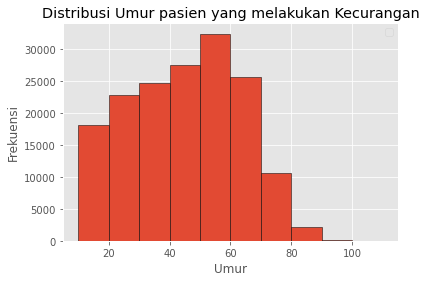

In [14]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
ages = data['umur']
bins = [10, 20, 30, 40, 50, 60, 70, 80, 90,100,110]

plt.hist(ages, bins=bins, edgecolor='black')
plt.xlabel("Umur")
plt.ylabel("Frekuensi")
plt.title("Distribusi Umur pasien yang melakukan Kecurangan")
plt.legend()
plt.show()

Dari Histogram diatas kita melihat bahwa pasien rentang umur 50-60 tahun adalah pasien yang paling banyak melakukan kecurangan penggunaan dana BPJS

In [15]:
#check info dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200217 entries, 0 to 200216
Data columns (total 53 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   visit_id       200217 non-null  int64 
 1   kdkc           200217 non-null  int64 
 2   dati2          200217 non-null  int64 
 3   typeppk        200217 non-null  object
 4   jkpst          200217 non-null  object
 5   umur           200217 non-null  int64 
 6   jnspelsep      200217 non-null  int64 
 7   los            200217 non-null  int64 
 8   cmg            200217 non-null  object
 9   severitylevel  200217 non-null  int64 
 10  diagprimer     200217 non-null  object
 11  dx2_a00_b99    200217 non-null  int64 
 12  dx2_c00_d48    200217 non-null  int64 
 13  dx2_d50_d89    200217 non-null  int64 
 14  dx2_e00_e90    200217 non-null  int64 
 15  dx2_f00_f99    200217 non-null  int64 
 16  dx2_g00_g99    200217 non-null  int64 
 17  dx2_h00_h59    200217 non-null  int64 
 18  dx2_

Dari info diatas dapat kita lihat bahwa dataset terdiri dari 49 fitur numerik dan 5 fitur kategorikal

In [16]:
#Checking null value
data.isnull().sum()

visit_id         0
kdkc             0
dati2            0
typeppk          0
jkpst            0
umur             0
jnspelsep        0
los              0
cmg              0
severitylevel    0
diagprimer       0
dx2_a00_b99      0
dx2_c00_d48      0
dx2_d50_d89      0
dx2_e00_e90      0
dx2_f00_f99      0
dx2_g00_g99      0
dx2_h00_h59      0
dx2_h60_h95      0
dx2_i00_i99      0
dx2_j00_j99      0
dx2_koo_k93      0
dx2_l00_l99      0
dx2_m00_m99      0
dx2_n00_n99      0
dx2_o00_o99      0
dx2_p00_p96      0
dx2_q00_q99      0
dx2_r00_r99      0
dx2_s00_t98      0
dx2_u00_u99      0
dx2_v01_y98      0
dx2_z00_z99      0
proc00_13        0
proc14_23        0
proc24_27        0
proc28_28        0
proc29_31        0
proc_32_38       0
proc39_45        0
proc46_51        0
proc52_57        0
proc58_62        0
proc63_67        0
proc68_70        0
proc71_73        0
proc74_75        0
proc76_77        0
proc78_79        0
proc80_99        0
proce00_e99      0
procv00_v89      0
label       

In [13]:
#checking NaN data
data.isna().sum()

visit_id         0
kdkc             0
dati2            0
typeppk          0
jkpst            0
umur             0
jnspelsep        0
los              0
cmg              0
severitylevel    0
diagprimer       0
dx2_a00_b99      0
dx2_c00_d48      0
dx2_d50_d89      0
dx2_e00_e90      0
dx2_f00_f99      0
dx2_g00_g99      0
dx2_h00_h59      0
dx2_h60_h95      0
dx2_i00_i99      0
dx2_j00_j99      0
dx2_koo_k93      0
dx2_l00_l99      0
dx2_m00_m99      0
dx2_n00_n99      0
dx2_o00_o99      0
dx2_p00_p96      0
dx2_q00_q99      0
dx2_r00_r99      0
dx2_s00_t98      0
dx2_u00_u99      0
dx2_v01_y98      0
dx2_z00_z99      0
proc00_13        0
proc14_23        0
proc24_27        0
proc28_28        0
proc29_31        0
proc_32_38       0
proc39_45        0
proc46_51        0
proc52_57        0
proc58_62        0
proc63_67        0
proc68_70        0
proc71_73        0
proc74_75        0
proc76_77        0
proc78_79        0
proc80_99        0
proce00_e99      0
procv00_v89      0
label       

Setelah dilakukan pengecekan, tidak ditemukan data null maupun data NaN, sehingga tidak perlu dilakukan Handling Missing data

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

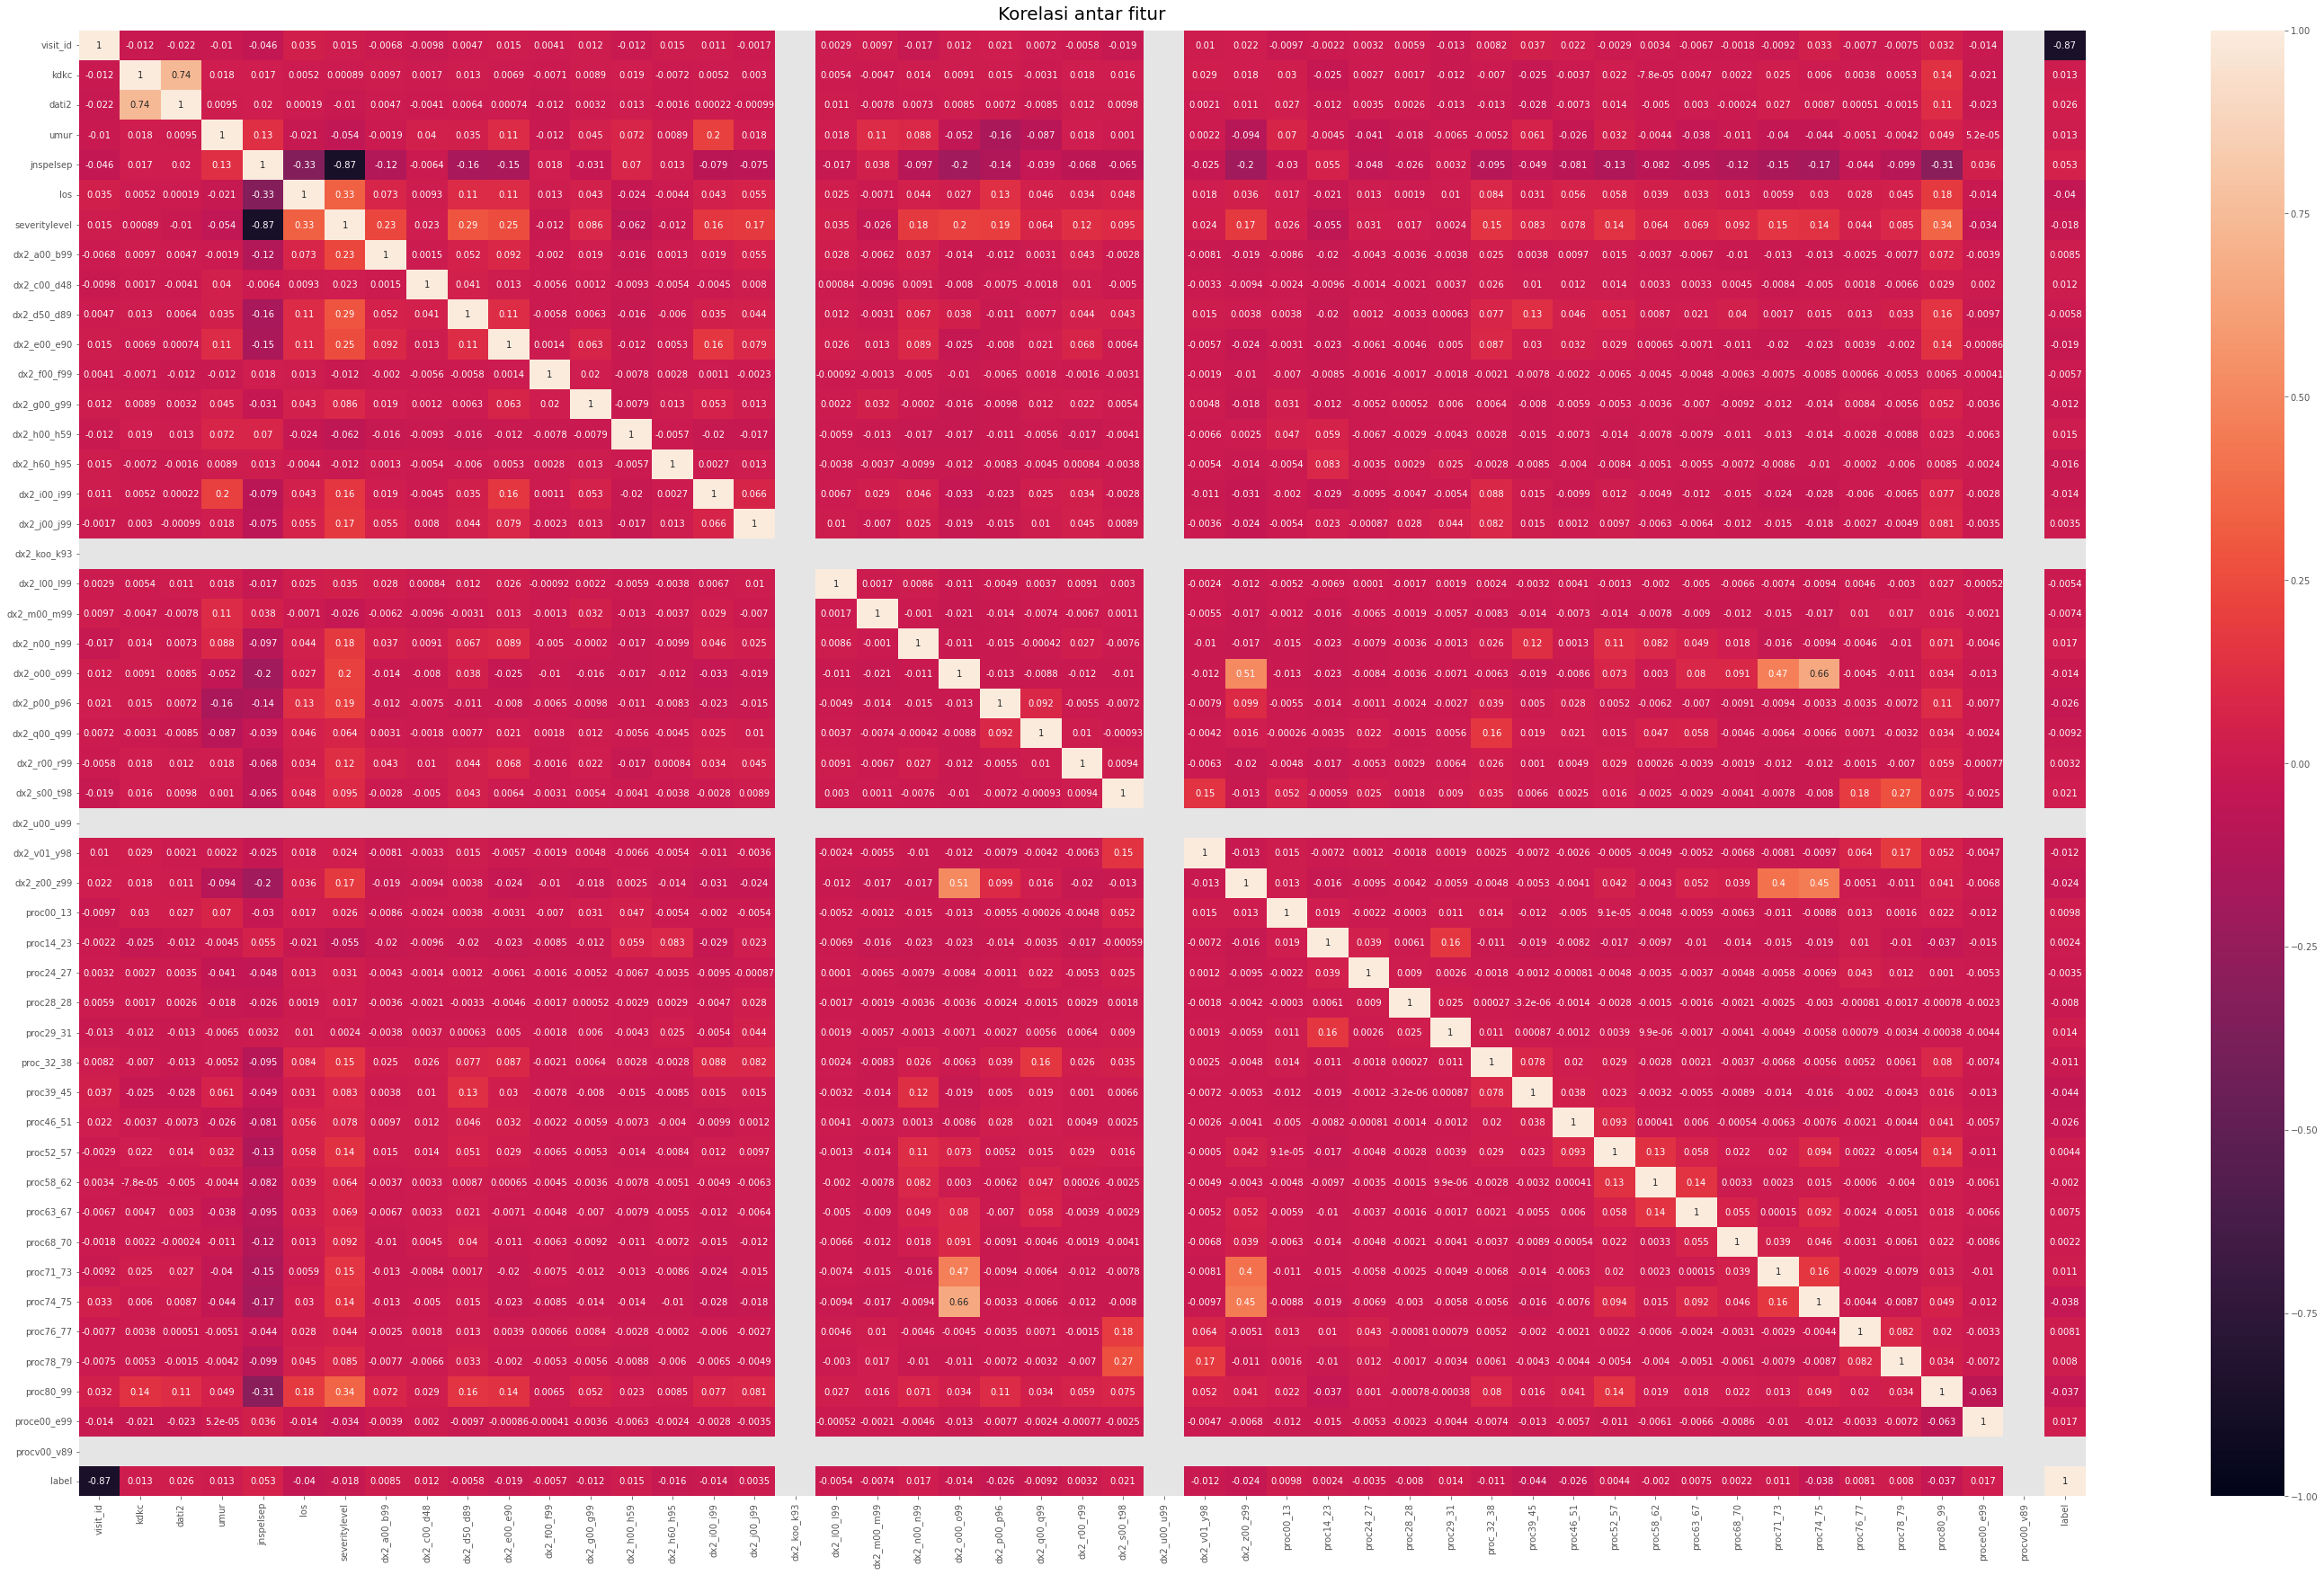

In [18]:
#Visualisasi korelasi antara fitur
plt.figure(figsize=(50, 30))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Korelasi antar fitur', fontdict={'fontsize':20}, pad=12);

Berdasarkan korelasi diatas, informasi yang kita dapatkan yaitu :

1. 'procv00_v89','dx2_u00_u99','dx2_koo_k93' tidak memiliki korelasi apapun antara fitur yang lain, sehingga ada baiknya fitur ini di drop


## **DATA PREPROCESSING**

1. Droping Unecessary Column

In [19]:
#Drop fitur yang tidak penting
data_new=data.drop(['visit_id','procv00_v89','dx2_u00_u99','dx2_koo_k93'], axis = 1)

In [20]:
data_new.sample(10)

,kdkc,dati2,typeppk,jkpst,umur,jnspelsep,los,cmg,severitylevel,diagprimer,...,proc58_62,proc63_67,proc68_70,proc71_73,proc74_75,proc76_77,proc78_79,proc80_99,proce00_e99,label
147447,1004,220,B,L,0,1,7,P,1,p00_p96,...,0,0,0,0,0,0,0,0,0,0
170959,101,17,SC,P,18,2,0,Q,0,h00_h59,...,0,0,0,0,0,0,0,0,0,0
5469,1703,287,C,P,40,2,0,Z,0,z00_z99,...,0,0,0,0,0,0,0,1,0,1
44142,302,54,B,L,59,2,0,F,0,f00_f99,...,0,0,0,0,0,0,0,0,0,1
150892,1108,171,SB,L,51,1,1,J,3,q00_q99,...,0,0,0,0,0,0,0,3,0,0
177793,1312,209,C,P,68,2,0,Q,0,i00_i99,...,0,0,0,0,0,0,0,0,0,0
94191,201,38,SB,P,45,2,0,Q,0,h60_h95,...,0,0,0,0,0,0,0,0,0,1
150023,903,113,A,P,59,1,25,J,3,j00_j99,...,0,0,0,0,0,0,0,0,0,0
167118,1002,133,SC,P,52,2,0,F,0,f00_f99,...,0,0,0,0,0,0,0,0,0,0
51260,1307,196,C,L,60,1,4,D,2,d50_d89,...,0,0,0,0,0,0,0,1,0,1


Seperti yang dapat kita lihat, beberapa fitur yang tidak penting telah dihapus dari dataset

2. Transforming Categorical Data

In [21]:
#Untuk mentransformasi data kategorikal tersebut kita menggunakan Laber Encoder Encoder darti Scikit Learn
from sklearn import preprocessing
lab_enc = preprocessing.LabelEncoder()

In [22]:
#Mentransformasi setiap data kategorikal
data_new['typeppk'] = lab_enc.fit_transform(data[['typeppk']])
data_new['jkpst'] = lab_enc.fit_transform(data[['jkpst']])
data_new['cmg'] = lab_enc.fit_transform(data[['cmg']])
data_new['diagprimer'] = lab_enc.fit_transform(data[['diagprimer']])

C:\Users\Prince Silaban\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [23]:
data_new.sample(5)

,kdkc,dati2,typeppk,jkpst,umur,jnspelsep,los,cmg,severitylevel,diagprimer,...,proc58_62,proc63_67,proc68_70,proc71_73,proc74_75,proc76_77,proc78_79,proc80_99,proce00_e99,label
143306,2202,228,23,1,35,1,3,19,1,7,...,0,0,0,0,0,0,0,0,0,0
913,1002,133,9,1,0,1,17,0,2,0,...,0,0,0,0,0,0,0,2,0,1
53304,1806,344,9,0,16,2,0,16,0,0,...,0,0,0,0,0,0,0,0,0,1
127922,1114,162,18,0,62,2,0,9,0,8,...,0,0,0,0,0,0,0,3,0,0
40082,1018,221,23,0,38,1,0,11,1,12,...,0,0,0,0,0,0,0,1,0,1


Fitur2 kategorikal telah di transformasi menjadi data numeric

3. Features Selection

Pada Tahap ini kita akan memilih fitur-fitur yang digunakan untuk dimodelkan menggunakan Select KBest

In [24]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X=data_new.drop(columns=['label'])
y = data_new['label'].values

#apply SelectKBest class to extract top 10 best features

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
print(featureScores.nlargest(49,'Score'))  

            Specs        Score
0            kdkc  9795.662620
1           dati2  8669.031951
6             los  7942.436161
2         typeppk  5990.419433
46      proc80_99   560.776145
4            umur   528.046221
36      proc39_45   395.828015
43      proc74_75   332.211238
24    dx2_p00_p96   323.959052
37      proc46_51   155.610284
27    dx2_s00_t98   138.840193
29    dx2_z00_z99   111.837531
13    dx2_e00_e90    89.431012
8   severitylevel    79.539135
5       jnspelsep    75.101308
23    dx2_o00_o99    73.363121
22    dx2_n00_n99    65.891060
16    dx2_h00_h59    61.612817
17    dx2_h60_h95    56.111807
47    proce00_e99    54.165704
18    dx2_i00_i99    44.565767
34      proc29_31    39.214685
42      proc71_73    34.471293
15    dx2_g00_g99    33.681687
35     proc_32_38    33.176392
11    dx2_c00_d48    29.393540
28    dx2_v01_y98    26.947723
25    dx2_q00_q99    25.993148
30      proc00_13    25.483466
45      proc78_79    17.321875
44      proc76_77    16.842587
10    dx

Dari hasil diatas, dapat kita lihat pe-rankingan fitur berdasarkan Select K-Best, berdasarkan ranking tersebut kita akan mendrop fitur yang memiliki satu digit score, dikarenakan fitur2 tersebut tidak akan berdampak banyak pada sahat pemodelan

In [25]:
#Drop fitur yang tidak penting
data_new=data_new.drop(['cmg','jkpst','dx2_d50_d89','dx2_f00_f99','dx2_l00_l99','proc52_57','proc24_27','dx2_j00_j99','dx2_r00_r99','proc14_23','proc68_70','proc58_62','diagprimer'], axis = 1)


In [26]:
data_new.sample(5)

,kdkc,dati2,typeppk,umur,jnspelsep,los,severitylevel,dx2_a00_b99,dx2_c00_d48,dx2_e00_e90,...,proc39_45,proc46_51,proc63_67,proc71_73,proc74_75,proc76_77,proc78_79,proc80_99,proce00_e99,label
3390,304,45,15,5,2,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
129667,207,28,2,54,2,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
188113,1201,178,2,27,1,5,1,0,0,0,...,0,0,0,0,2,0,0,4,0,0
180708,1001,135,14,54,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
158011,1301,217,1,69,2,0,0,0,0,0,...,0,0,0,0,0,0,0,5,0,0


4. Scaling Dataset

In [27]:
X=data_new.drop(columns=['label'])
y = data_new['label'].values

In [28]:
#Mengubah skala data menjadi skala antara 0-1 dengan MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X= scaler.fit_transform(X)

In [29]:
X

array([[0.40159681, 0.28273245, 0.91666667, ..., 0.        , 0.        ,
        0.        ],
       [0.47984032, 0.37760911, 0.08333333, ..., 0.        , 0.17391304,
        0.        ],
       [0.40439122, 0.32447818, 0.04166667, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.03992016, 0.07020873, 0.91666667, ..., 0.        , 0.        ,
        0.        ],
       [0.36207585, 0.24098672, 0.04166667, ..., 0.        , 0.04347826,
        0.        ],
       [0.36526946, 0.22011385, 0.95833333, ..., 0.        , 0.        ,
        0.        ]])

Scaling dataset dilakukan supaya setiap data yang ada pada dataset memiliki skala yang sama

5. Split Dataset

In [30]:
#Mengsplit data dengan menggunakan sklearn ( rasio 80:20)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## **MODELING**

In [31]:
# import SVC classifier
from sklearn.svm import SVC
# import metrics to compute accuracy
from sklearn.metrics import accuracy_score

Untuk model pertama kita menggunakan kernel RBF

In [41]:
svmRBF = SVC(
    kernel = 'rbf',
    C=0.1,
    gamma = 1,
)
svmRBF.fit(X_train, y_train)
y_pred = svmRBF.predict(X_test)
print('Model accuracy kernel RBF : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy kernel RBF : 0.5648


In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))  

              precision    recall  f1-score   support

           0       0.56      0.61      0.58     20019
           1       0.57      0.52      0.55     20025

    accuracy                           0.56     40044
   macro avg       0.57      0.56      0.56     40044
weighted avg       0.57      0.56      0.56     40044



Dari hasil diatas kita mendapatkan Accuracy sebesar 0,5648 dengan menggunakan kernel RBF. Selanjutnya kita akan melakukan parameter tuning untuk mencoba menaikkan akurasi

## **PARAMETER TUNING DAN EVALUASI**

Pada parameter tuning, kita akan mentuning parameter C, gamma, dan juga kernel yang berbeda untuk mencoba meningkatkan akurasi model.

In [32]:
#SVM menggunakan kernel linear dengan nilai parameter C
svmLinear = SVC(
    kernel = 'linear',
    C=1
)
svmLinear.fit(X_train, y_train)
y_pred = svmLinear.predict(X_test)
print('Model accuracy kernel Linear : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy kernel Linear : 0.5448


In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.34      0.42     20019
           1       0.53      0.75      0.62     20025

    accuracy                           0.54     40044
   macro avg       0.55      0.54      0.52     40044
weighted avg       0.55      0.54      0.52     40044



In [34]:
#SVM menggunakan kernel Polynomial dengan nilai parameter C
svmPoly = SVC(
    kernel = 'poly',
    C=1,
    gamma = 0.01,
    degree =2
)
svmPoly.fit(X_train, y_train)
y_pred = svmPoly.predict(X_test)
print('Model accuracy kernel Polynomial : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy kernel Polynomial : 0.5459


In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.54      0.66      0.59     20019
           1       0.56      0.43      0.49     20025

    accuracy                           0.55     40044
   macro avg       0.55      0.55      0.54     40044
weighted avg       0.55      0.55      0.54     40044



In [39]:
#SVM menggunakan kernel Sigmoid dengan nilai parameter C
svmSigmoid = SVC(
    kernel = 'sigmoid',
    C=1,
    gamma = 0.1,
)
svmSigmoid.fit(X_train, y_train)
y_pred = svmSigmoid.predict(X_test)
print('Model accuracy kernel Sigmoid : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy kernel Sigmoid : 0.5088


In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.51      0.50      0.50     20019
           1       0.51      0.52      0.51     20025

    accuracy                           0.51     40044
   macro avg       0.51      0.51      0.51     40044
weighted avg       0.51      0.51      0.51     40044



In [43]:
svmRBF = SVC(
    kernel = 'rbf',
    C=1,
    gamma = 1,
)
svmRBF.fit(X_train, y_train)
y_pred = svmRBF.predict(X_test)
print('Model accuracy kernel RBF : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy kernel RBF : 0.5782


In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.59      0.58     20019
           1       0.58      0.57      0.57     20025

    accuracy                           0.58     40044
   macro avg       0.58      0.58      0.58     40044
weighted avg       0.58      0.58      0.58     40044



## Hasil

Pada modeling awal akurasi model yang didapatkan adalah 0.5448. Untuk meningkatkan akurasi dilakukan parameter tuning, yang dimana parameter yang dituning meliputi C, kernel, dan gamma. Setelah melakukan parameter tuning, didapatkan kenaikan akurasi model menjadi 0.5782 dengan rincian Accuracy 58%, Precision 58%, dan recall 59%.